In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

###讀入data

In [3]:
train_data = pd.read_csv('drive/My Drive/Machine_Learning/Final/train.csv', index_col = 'id')
print(train_data.shape)
#train_data_pure = train_data.pop("failure") #不能這樣寫，不然後面的train_data都沒有failure了
test_data = pd.read_csv('drive/My Drive/Machine_Learning/Final/test.csv', index_col = 'id')
print(test_data.shape)

(26570, 25)
(20775, 24)


####切分X_columns and Y_column

In [4]:
Y_column = ['failure']

# attribute -> 分類
# loading -> float
# measurement -> int and float
X_columns_attribute = [x for x in train_data.columns.values if x.startswith('attribute_')]
X_columns_loading = ['loading']
X_columns_measurement = [x for x in train_data.columns.values if x.startswith('measurement_')]
X_columns = X_columns_attribute + X_columns_loading + X_columns_measurement
print(X_columns)

#X_columns_category = X_columns_attribute
#X_columns_int = [x for x in X_columns_measurement if train_data[x].dtype == "int"]
#X_columns_float = [x for x in X_columns if train_data[x].dtype == "float"]

['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3', 'loading', 'measurement_0', 'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']


####切分training and testing

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_data[X_columns], train_data[Y_column],
    test_size=0.20, random_state=0, stratify=train_data[Y_column]
)
#不切反而更糟 overfitting

###Pre-Processing

####選擇feature

#####product_code (x)
#####train_data和test_data沒有重疊

In [6]:
train_data['product_code'].value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

In [7]:
test_data['product_code'].value_counts()

F    5422
I    5228
G    5107
H    5018
Name: product_code, dtype: int64

##### loading
##### 直接和failure最有關係的

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#https://www.kaggle.com/code/alvinleenh/tpsoct22-6-basic-feature-selection-techniques?scriptVersionId=107676046
trainCorr = train_data.corr()
#threshold = 0.07
corr=abs(trainCorr['failure'])
#result = corr[corr>threshold]
corr.sort_values(ascending=False)

failure           1.000000
loading           0.129089
measurement_17    0.033905
attribute_3       0.019222
measurement_5     0.018079
measurement_8     0.017119
measurement_7     0.016787
measurement_2     0.015808
measurement_6     0.014791
measurement_1     0.010810
measurement_4     0.010488
measurement_0     0.009646
attribute_2       0.006337
measurement_14    0.006211
measurement_11    0.004801
measurement_12    0.004398
measurement_9     0.003587
measurement_3     0.003577
measurement_15    0.003544
measurement_16    0.002237
measurement_13    0.001831
measurement_10    0.001515
Name: failure, dtype: float64

#####measurement 0, 1, 2

In [10]:
# 唯三沒有missing data的, 不用白不用
train_miss = [col for col in train_data.columns if train_data[col].isnull().sum()!=0]
print('Train data with missing data: \n', train_miss)

test_miss = [col for col in test_data.columns if test_data[col].isnull().sum()!=0]
print('Train data with missing data: \n', test_miss)

Train data with missing data: 
 ['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']
Train data with missing data: 
 ['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']


#####area
#####The idea here is that these two seem to me that they are dimensions of the material used for cleaning i.e, width and length for example. We could multiply and get area as new feature instead. Then drop the them.

In [11]:
#https://www.kaggle.com/code/maxsarmento/lb-0-58978-standing-on-the-shoulder-of-giants?scriptVersionId=102785631
display(train_data['attribute_2'].unique())
display(train_data['attribute_3'].unique())
print()

array([9, 8, 5, 6])

array([5, 8, 6, 9])

#####missing data
#####也許產品故障的原因會觸發測量設備的故障
#####Maybe the cause of a product failure triggers the failure of a measurement device

In [12]:
from matplotlib import pyplot as plt
import scipy.stats

In [13]:
print(train_data.failure.value_counts() / len(train_data))

0    0.787392
1    0.212608
Name: failure, dtype: float64


feature           fail   miss   failure rate       z    p-value
loading         :   44 /  250 = 0.176          -1.41      0.157
measurement_3   :   61 /  381 = 0.160          -2.50      0.012
measurement_4   :  128 /  538 = 0.238           1.43      0.151
measurement_5   :  172 /  676 = 0.254           2.66      0.008
measurement_6   :  171 /  796 = 0.215           0.15      0.879
measurement_7   :  197 /  937 = 0.210          -0.18      0.860
measurement_8   :  218 / 1048 = 0.208          -0.36      0.716
measurement_9   :  283 / 1227 = 0.231           1.54      0.123
measurement_10  :  277 / 1300 = 0.213           0.04      0.967
measurement_11  :  311 / 1468 = 0.212          -0.07      0.944
measurement_12  :  356 / 1601 = 0.222           0.95      0.340
measurement_13  :  373 / 1774 = 0.210          -0.24      0.809
measurement_14  :  413 / 1874 = 0.220           0.82      0.411
measurement_15  :  430 / 2009 = 0.214           0.16      0.876
measurement_16  :  436 / 2110 = 0.207   

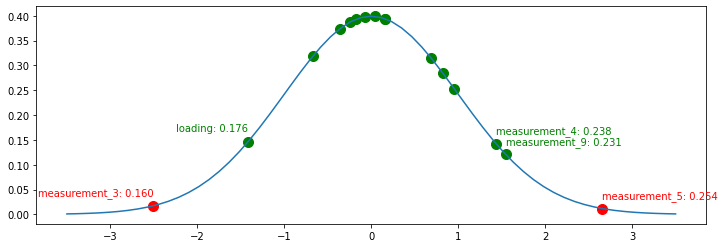

In [14]:
# https://www.kaggle.com/code/ambrosm/tpsaug22-eda-which-makes-sense
# 在缺少測量值的情況下計算有條件的產品故障率, 和無條件的失敗率0.212608比較
# missing3 and missing5

# plotting the bell curve
plt.figure(figsize=(12, 4))
z_ticks = np.linspace(-3.5, 3.5, 61)
pdf = scipy.stats.norm.pdf(z_ticks)
plt.plot(z_ticks, pdf)

print('feature           fail   miss   failure rate       z    p-value')
for f in train_data.columns:
    if train_data[f].isna().sum() > 0: # 有缺失資料
        total = train_data[f].isna().sum()
        fail = train_data[train_data[f].isna()].failure.sum()
        # z-score, pdf = probability density function
        z = (fail / total - 0.212608) / (np.sqrt(0.212608 * (1-0.212608)) / np.sqrt(total))
        plt.scatter([z], [scipy.stats.norm.pdf(z)], c='r' if abs(z) > 2 else 'g', s=100)
        print(f"{f:15} : {fail:4} / {total:4} = {fail/total:.3f}          {z:5.2f}      {2*scipy.stats.norm.cdf(-abs(z)):.3f}")
        if abs(z) > 1: plt.annotate(f"{f}: {fail / total:.3f}",
                                    (z, scipy.stats.norm.pdf(z)),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='left' if z > 0 else 'right',
                                    color='r' if abs(z) > 2 else 'g')
# 缺失 measurement_3 和缺失 measurement_5 的條件故障率明顯「偏離」平均故障率

#####measurement 17
#####和大家的關聯性大

In [15]:
import seaborn as sns

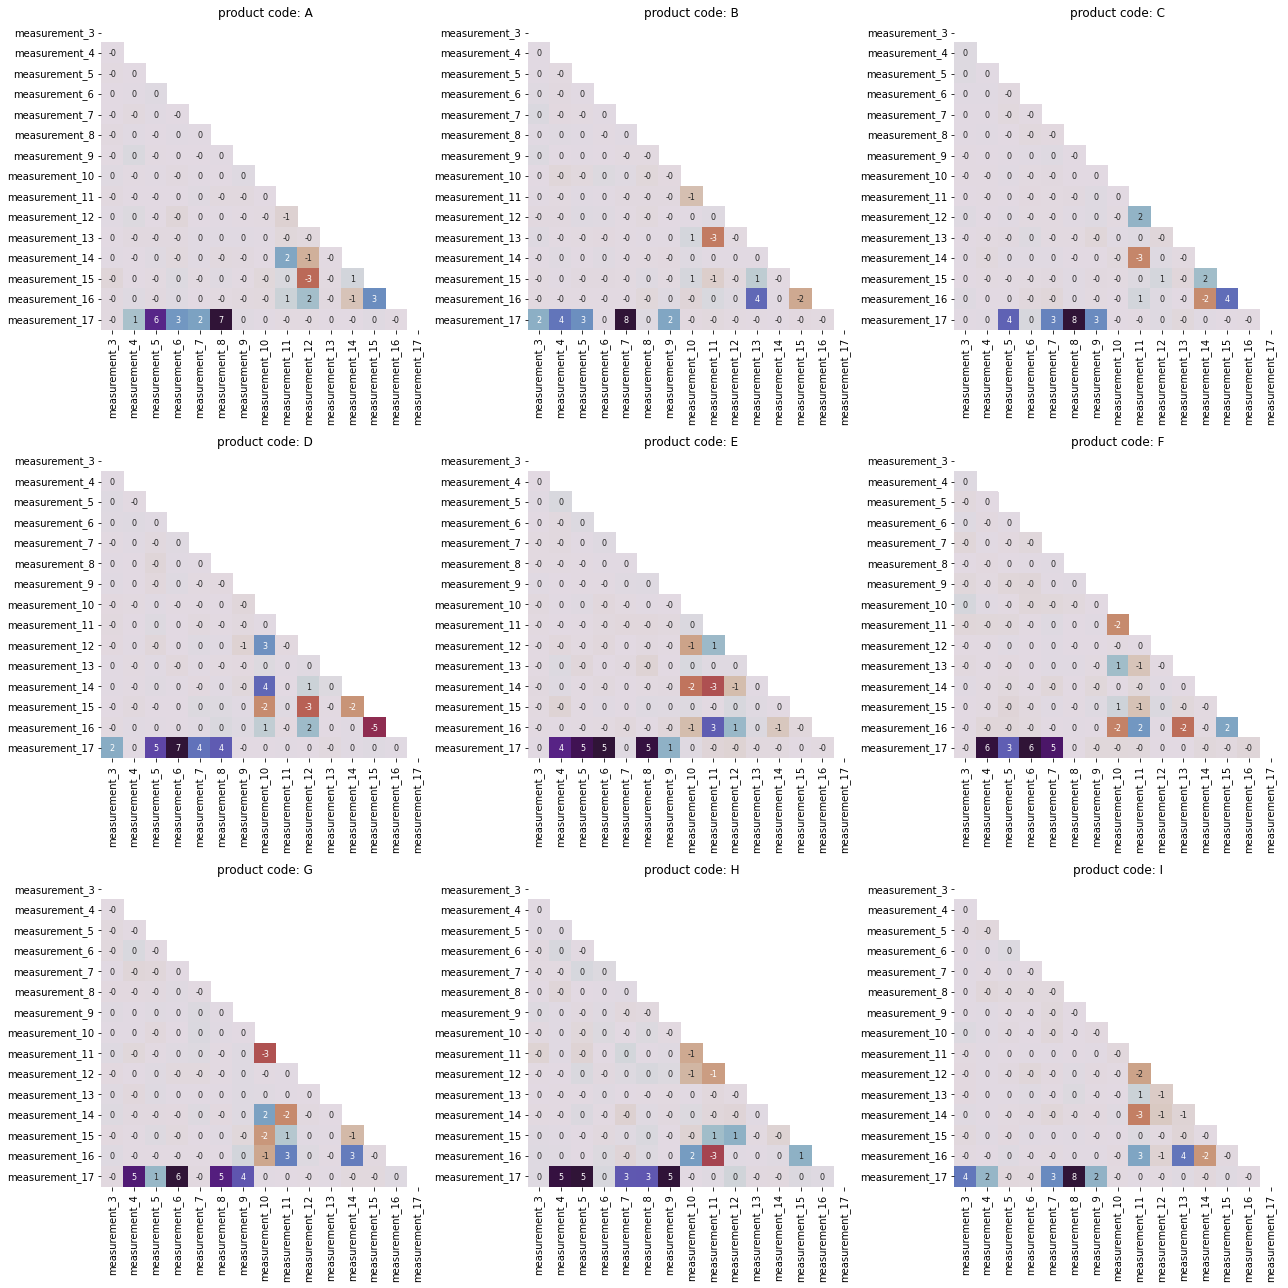

In [16]:
data = pd.concat([train_data, test_data])
_, axs = plt.subplots(3, 3, figsize=(18, 18))
for product, ax in zip(np.unique(data.product_code), axs.ravel()):
    corr = data.loc[data.product_code == product, [f'measurement_{i}' for i in range(3, 18)]].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr*10, mask=mask, linewidth=0.0, fmt='.0f', 
                annot=True, annot_kws={'size': 8}, 
                cmap='twilight_shifted_r', center=0, ax=ax, cbar=False)
    ax.set_title(f'product code: {product}')
plt.tight_layout(w_pad=0.5)
plt.show()

####篩完我們需要的feature

In [17]:
#怎麼選的部分
#https://www.kaggle.com/code/alvinleenh/tpsoct22-6-basic-feature-selection-techniques?scriptVersionId=107676046
#https://www.kaggle.com/code/desalegngeb/tps08-logisticregression-qlattice/notebook
def create_features(df):
    # https://www.kaggle.com/code/takanashihumbert/tps-aug22-lb-0-59013
    # missing3 and missing5
    df['m3_missing'] = df['measurement_3'].isnull().astype(np.int8)
    df['m5_missing'] = df['measurement_5'].isnull().astype(np.int8)
    
    # area
    df['area'] = df['attribute_2'] * df['attribute_3']
    # https://www.kaggle.com/code/desalegngeb/tps08-logisticregression-qlattice/notebook
    df['missing(3*5)'] = df['m3_missing'] * df['m5_missing']
    #df['measurement(3*5)'] = df['measurement_3'] * df['measurement_5']

    # measurement0, 1, 2都沒有missing data
    df['measurement_0 / loading'] = df['measurement_0'] / df['loading']
    df['measurement_1 / loading'] = df['measurement_1'] / df['loading']
    df['measurement_2 / loading'] = df['measurement_2'] / df['loading']
    # measure17重要，其他取平均就好
    #df['measurement_3_to_16_mean'] = df[[f"measurement_{x:d}" for x in range(3,17)]].mean(axis='columns')
    df['measurement_3_to_16_mean / loading'] = df[[f"measurement_{x:d}" for x in range(3,17)]].mean(axis='columns') / df['loading']
    df['measurement_17 / loading'] = df['measurement_17'] / df['loading']

In [18]:
'''
X_columns = [ #0.59152
    'loading',
    'attribute_0',
    'attribute_1',
    'area',
    
    'measurement_0 / loading',
    'measurement_1 / loading',
    'measurement_2 / loading',
    'measurement_3_to_16_mean / loading',
    'measurement_17 / loading',
    
    'm3_missing',
    'm5_missing',
] 
'''

"\nX_columns = [ #0.59152\n    'loading',\n    'attribute_0',\n    'attribute_1',\n    'area',\n    \n    'measurement_0 / loading',\n    'measurement_1 / loading',\n    'measurement_2 / loading',\n    'measurement_3_to_16_mean / loading',\n    'measurement_17 / loading',\n    \n    'm3_missing',\n    'm5_missing',\n] \n"

In [19]:
X_columns = [ # 0.59184
    'loading',
    # 把attribute0, 1都拿掉的話 private : 0.59184 -> 0.59123, public : 0.58339 -> 0.58417
    'attribute_0',
    # 只拿掉attribute1的話 private : 0.59157, public : 0.58326
    'attribute_1',

    'm3_missing',
    'm5_missing',
    'area',
    'missing(3*5)',
    #'measurement(3*5)',

    'measurement_0 / loading',
    'measurement_1 / loading',
    'measurement_2 / loading',
    'measurement_3_to_16_mean / loading',
    'measurement_17 / loading',
    #'measurement_0',
    #'measurement_1',
    #'measurement_2',
    #'measurement_3_to_16_mean',
    #'measurement_17',
]





In [20]:
create_features(X_train)
create_features(X_test)
create_features(train_data)
create_features(test_data)

###training

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV
#logistic_regression_model = LogisticRegressionCV(random_state=0, cv=5, scoring="roc_auc")

In [22]:
# category : 最常見的
# int : 中位數
# float : 平均
category_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # 把類別轉換成數值資料
])

int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())
])

# 加add_indicator從0.59128 -> 0.59184
float_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', add_indicator=True)),
    ('scaler', StandardScaler())
])

columns_category = [x for x in X_columns if train_data[x].dtype == "object"]
columns_int = [x for x in X_columns if train_data[x].dtype == "int"]
columns_float = [x for x in X_columns if train_data[x].dtype == "float"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', category_transformer, columns_category),
        ('int', int_transformer, columns_int),
        ('float', float_transformer, columns_float)
    ]
)

In [23]:
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegressionCV(
        Cs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], # inverse of regularization strength
        cv = 5, # cv = k-fold
        penalty = 'elasticnet', # both L1 and L2 penalty terms are added
        scoring = "roc_auc", # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
        solver = 'saga',
        random_state = 0, 
        max_iter = 5000,
        l1_ratios = np.arange(0, 1.01, 0.1), # 0 ~ 1.01, 間隔0.1 
        tol = 1e-3
    ))
])
logistic_regression_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['attribute_0',
                                                   'attribute_1']),
                                                 ('int',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                

In [24]:
# save file
import joblib
joblib.dump(logistic_regression_pipeline, 'LR_model')

['LR_model']

In [25]:
#test_data_predict_prob = logistic_regression_pipeline.predict_proba(test_data[X_columns])[:, 1]

In [26]:
'''
output = pd.DataFrame({'id': test_data.index, 'failure': test_data_predict_prob})
output.to_csv('109550137_submission_test.csv', index=False)
'''

"\noutput = pd.DataFrame({'id': test_data.index, 'failure': test_data_predict_prob})\noutput.to_csv('109550137_submission_test.csv', index=False)\n"